In [2]:
import os
os.chdir("D:\Kaggle Datasets")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv("Classified Data.txt")

In [8]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [11]:
df = df.drop(axis = 1, columns = "Unnamed: 0")

In [12]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(df.drop("TARGET CLASS", axis = 1))

StandardScaler()

In [30]:
scaler_features = scaler.transform(df.drop("TARGET CLASS", axis = 1))

In [31]:
df_features = pd.DataFrame(scaler_features,columns=df.columns[:-1])

In [33]:
df_features.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [36]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(scaler_features, df["TARGET CLASS"], test_size= 0.25)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier(n_neighbors= 1)

In [42]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [43]:
pred = knn.predict(X_test)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
print(confusion_matrix(Y_test, pred))

[[111   9]
 [ 12 118]]


In [47]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       120
           1       0.93      0.91      0.92       130

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



In [49]:
error_rate = []
for i in range(1, 30):
    
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, Y_train)
    pred_every = knn.predict(X_test)
    error_rate.append(np.mean(pred_every != Y_test))

Text(0, 0.5, 'Error rate')

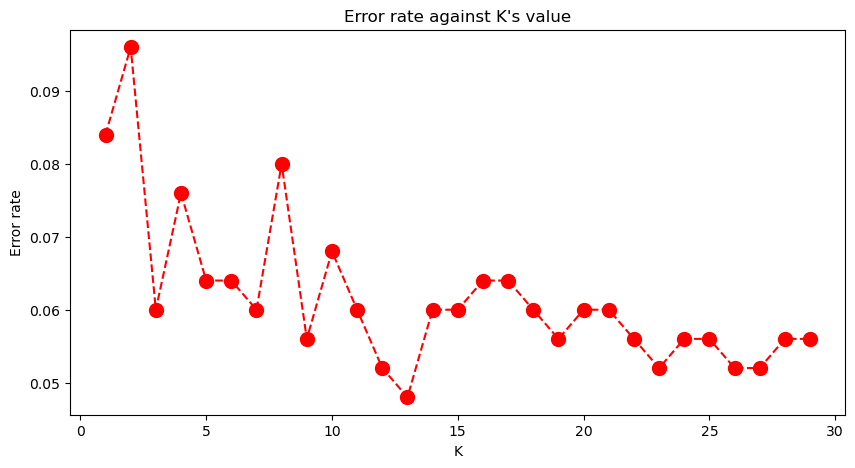

In [51]:
plt.figure(figsize= (10,5))
plt.plot(range(1,30), error_rate, color = "red", linestyle = "dashed", marker = "o", markerfacecolor  = "red", markersize = 10)
plt.title("Error rate against K's value")
plt.xlabel("K")
plt.ylabel("Error rate")

In [52]:
knn = KNeighborsClassifier(n_neighbors= 23)

knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

print("Scores and Accuracy for K = 23")
print(confusion_matrix(Y_test, pred))
print("\n")
print(classification_report(Y_test, pred))

Scores and Accuracy for K = 23
[[113   7]
 [  6 124]]


              precision    recall  f1-score   support

           0       0.95      0.94      0.95       120
           1       0.95      0.95      0.95       130

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

